# Lending Club Case Study
### Problem Statement

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [2]:
# importing all library used for this analysis
import pandas as pd
import numpy as np

# Importing Graphical Ploting library for Data Visualiazation 
import matplotlib.pyplot as plt

from datetime import datetime as dt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
import warnings
warnings.filterwarnings('ignore')

#### Importing Data File

Our dataset contains information about all loans issued between 2007 and 2015 including current loan status(Current, late, Fully Paid etc.). It also contains credit scores, number of finance inqueries, zip code, state, collections etc. Lets get Started...

In [3]:
# low_memory=False helps to read the file in one go and not in chucks, 
# With in the data there exsits columns with mixed data type (dtype) lowering the perofomance.
# reading loan data as pandas dataframe
loan = pd.read_csv("loan.csv",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
#Check the datatypes of all the columns of the dataframe
loan.info()
loan.columns.values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### Data Cleaning: Missing Value Treatment


In [9]:
# Finding the percentage of the Null values and Sorting them (Percentage give a better understanding the count of null values)
missing_value_per = loan.isnull().mean()*100
result_desc = missing_value_per.sort_values(ascending = False)

# Computing the count of columns where null value of the coulmn is equal to 100% 
(result_desc != 100).sum()

57

In [8]:
#finding total null values in each column and store them in null_value variable.
null_value = loan.isnull().sum()
#printing columns that have more than 0 null values or missing values
null_value[null_value > 0]

emp_title                          2459
emp_length                         1075
desc                              12940
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


In [11]:
#Removing columns which has all null values in it.
loan.drop(null_value[null_value == 39717].index, axis=1, inplace=True)

In [14]:
loan.shape

(39717, 57)

In [16]:
#checking how many unique values are there in each column
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

Analysing this we found that the column named ["tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq application_type, policy_code, collections_12_mths_ex_med, initial_list_status, pymnt_plan"] has only 1 unique value. So we can remove those column as it won't give us useful information

In [17]:
#storing unique values of each column in unique_column
unique_column = loan.nunique()

#storing only the columns that has unique value equals to 1 in single_unique
single_unique = unique_column[unique_column.values == 1]
#showing index of single unique value
single_unique.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [18]:
#dropping all the columns that have unique value equals to 1
loan.drop(columns = list(single_unique.index), inplace=True)
#checking shape
loan.shape

(39717, 48)

#### Lets start the treatment of missing values

Since we have too many columns, lets find the percentage of missing data in each column and print columns which has more that 40 percent missing data

In [37]:
# Threshold Setting
nullcol_thres = 0.4*len(loan)
null_col_head = [col for col in loan.columns if loan[col].isnull().sum()>=nullcol_thres]

# Dropping Columns
filtered_df = loan.drop(null_col_head, axis=1)

In [40]:
# Dropping Columns
filtered_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,16-Jan,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,14-Dec,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,12-Aug,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,13-Mar,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
#once again analysing the unique value in descending order
loan.nunique().sort_values(ascending=False).head()

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
dtype: int64

The data shows column named ["id, url and member_id"] are having same number of unique value that of number of rows in dataframe. So, we should remove two columns i.e. url and member_id as we required only one primary key.

In [21]:
#dropping url and member_id
loan.drop(['url', 'member_id'], axis=1, inplace=True)
#checking shape
loan.shape

(39717, 46)

In [24]:
#analysing null values once again in each column
loan.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [25]:
#dropping the rows of above null values
loan.dropna(subset=['emp_title','emp_length', 'desc','title','mths_since_last_delinq','mths_since_last_record', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
loan.shape

(569, 46)

In [26]:
#analysing the columns
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

There are some customer behaviour variables that are not availbale at the time of loan application, and thus they cannot be used as prediction of credit approval therefore we can remove those variables from our dataset.

In [27]:
#dropping customer behaviour columnS
loan.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1, inplace=True)
#checking shape
loan.shape

(569, 26)

In [28]:
#analyzing unique value of loan_status column
loan["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off'], dtype=object)

<b>As we can't predict the result of Current brrower loan status whether they will end up with fully paid or charged off so we can drop the records related to it.<b>

In [29]:
#dropping rows having value current
loan = loan[loan["loan_status"] != 'Current']
#checking shape
loan.shape

(555, 26)

In [30]:
#analyzing unique value of term column
loan["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

We can see that there is a empty space at the start of the term values. So let's remove it.

In [31]:
#Stripping empty space in values in term
loan["term"] = loan.term.str.strip()
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [37]:
# Dropping the columns which are associated with current status of Loan of the applicant.
loan=loan.drop(['installment'],axis=1)
loan.shape

(555, 24)

In [39]:
%matplotlib inline
import seaborn as sns

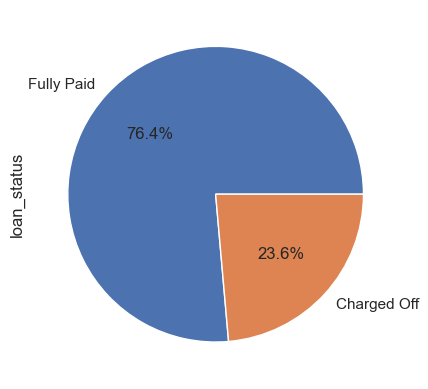

In [40]:
# Checking the distribution ratio of Loan status attributes.
loan['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

___Analysing the dataframe after dropping the columns___

In [33]:
# checking the null value in term of percentages for each columns
((loan.isnull().sum()/len(loan))*100).sort_values(ascending= False).head(60)

next_pymnt_d              100.0
id                          0.0
loan_amnt                   0.0
mths_since_last_record      0.0
mths_since_last_delinq      0.0
dti                         0.0
addr_state                  0.0
zip_code                    0.0
title                       0.0
purpose                     0.0
desc                        0.0
loan_status                 0.0
issue_d                     0.0
verification_status         0.0
annual_inc                  0.0
home_ownership              0.0
emp_length                  0.0
emp_title                   0.0
sub_grade                   0.0
grade                       0.0
installment                 0.0
int_rate                    0.0
term                        0.0
funded_amnt_inv             0.0
funded_amnt                 0.0
pub_rec_bankruptcies        0.0
dtype: float64

In [42]:
((loan.isnull().sum()/len(loan))*100).sort_values(ascending= False)

id                        0.0
loan_amnt                 0.0
mths_since_last_record    0.0
mths_since_last_delinq    0.0
dti                       0.0
addr_state                0.0
zip_code                  0.0
title                     0.0
purpose                   0.0
desc                      0.0
loan_status               0.0
issue_d                   0.0
verification_status       0.0
annual_inc                0.0
home_ownership            0.0
emp_length                0.0
emp_title                 0.0
sub_grade                 0.0
grade                     0.0
int_rate                  0.0
term                      0.0
funded_amnt_inv           0.0
funded_amnt               0.0
pub_rec_bankruptcies      0.0
dtype: float64

In [47]:
result_desc
loan['int_rate'].value_counts()

9.99%     11
13.49%    10
11.86%    10
11.99%     9
11.49%     9
          ..
16.11%     1
21.82%     1
20.25%     1
18.78%     1
11.22%     1
Name: int_rate, Length: 197, dtype: int64

In [48]:
loan.groupby(['loan_status'])['emp_length'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,131,11,10+ years,53
Fully Paid,424,11,10+ years,136


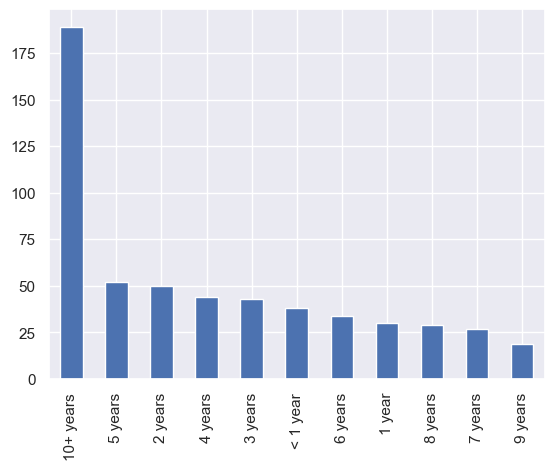

In [46]:
loan['emp_length'].value_counts().plot.bar()
plt.show()

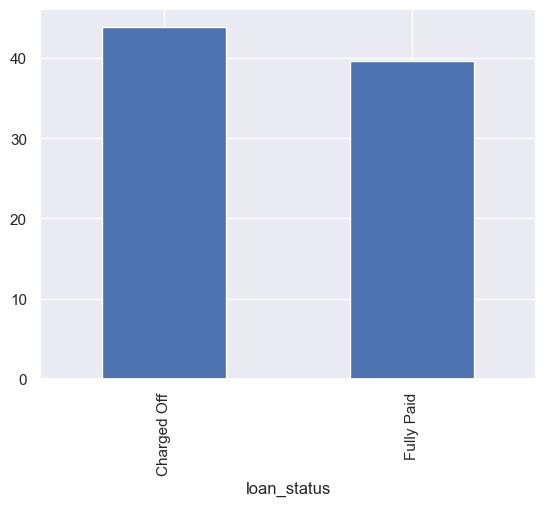

In [49]:
loan.groupby(['loan_status'])['mths_since_last_delinq'].mean().plot.bar()
plt.show()

In [50]:
#Dropping the coloumn mths_since_last_delinq
loan= loan.drop('mths_since_last_delinq',axis=1)
loan.shape

(555, 23)

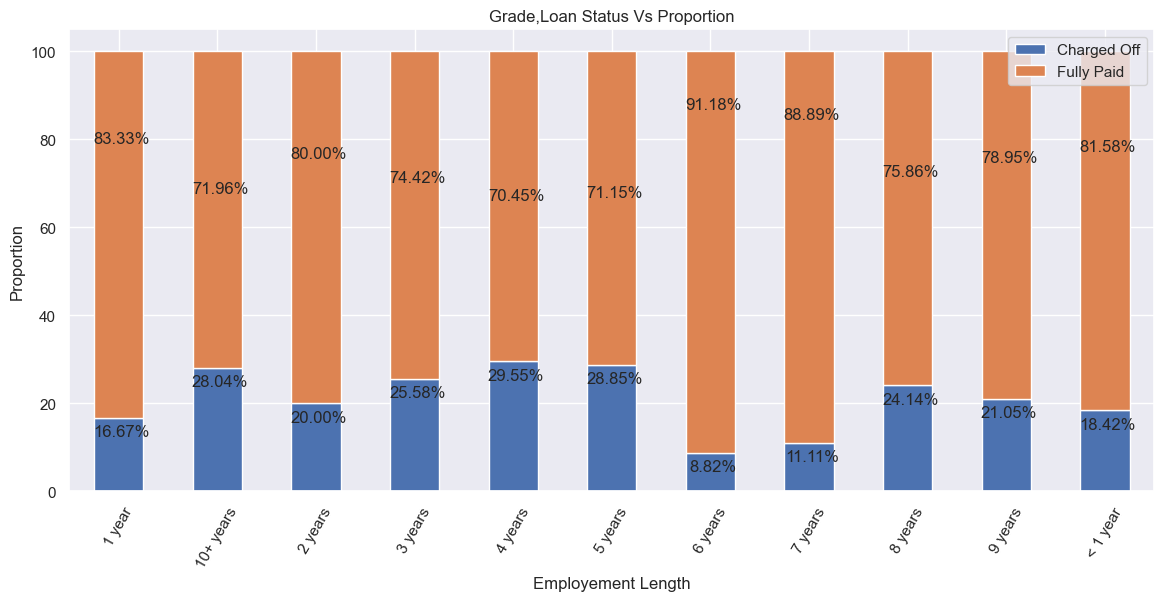

In [51]:
plots=loan.groupby('emp_length')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(14,6))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(2, -10),
                       textcoords='offset points')
plt.xticks(rotation=60)
plt.ylabel("Proportion")
plt.legend(loc='upper right')
plt.title("Grade,Loan Status Vs Proportion")
plt.xlabel('Employement Length')
plt.show()

<b>As we can see the Employment length having 10+ Years are more likely to Charged off. Hence Lending club should examine carefully before approving the Loan to them.<b>

In [52]:
# Checking the correlation between numricals features to get more insights
loan.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,mths_since_last_record,pub_rec_bankruptcies
id,1.000000,0.054110,0.062287,0.255104,0.008856,0.033077,0.010729,0.036961
loan_amnt,0.054110,1.000000,0.992174,0.871780,0.256366,0.074512,0.106983,0.099012
funded_amnt,0.062287,0.992174,1.000000,0.880038,0.256407,0.077300,0.098335,0.092630
funded_amnt_inv,0.255104,0.871780,0.880038,1.000000,0.246595,0.081299,0.036602,0.030147
annual_inc,0.008856,0.256366,0.256407,0.246595,1.000000,-0.165611,0.037009,0.012945
dti,0.033077,0.074512,0.077300,0.081299,-0.165611,1.000000,0.120146,0.080463
mths_since_last_record,0.010729,0.106983,0.098335,0.036602,0.037009,0.120146,1.000000,0.839423
pub_rec_bankruptcies,0.036961,0.099012,0.092630,0.030147,0.012945,0.080463,0.839423,1.000000


<AxesSubplot:>

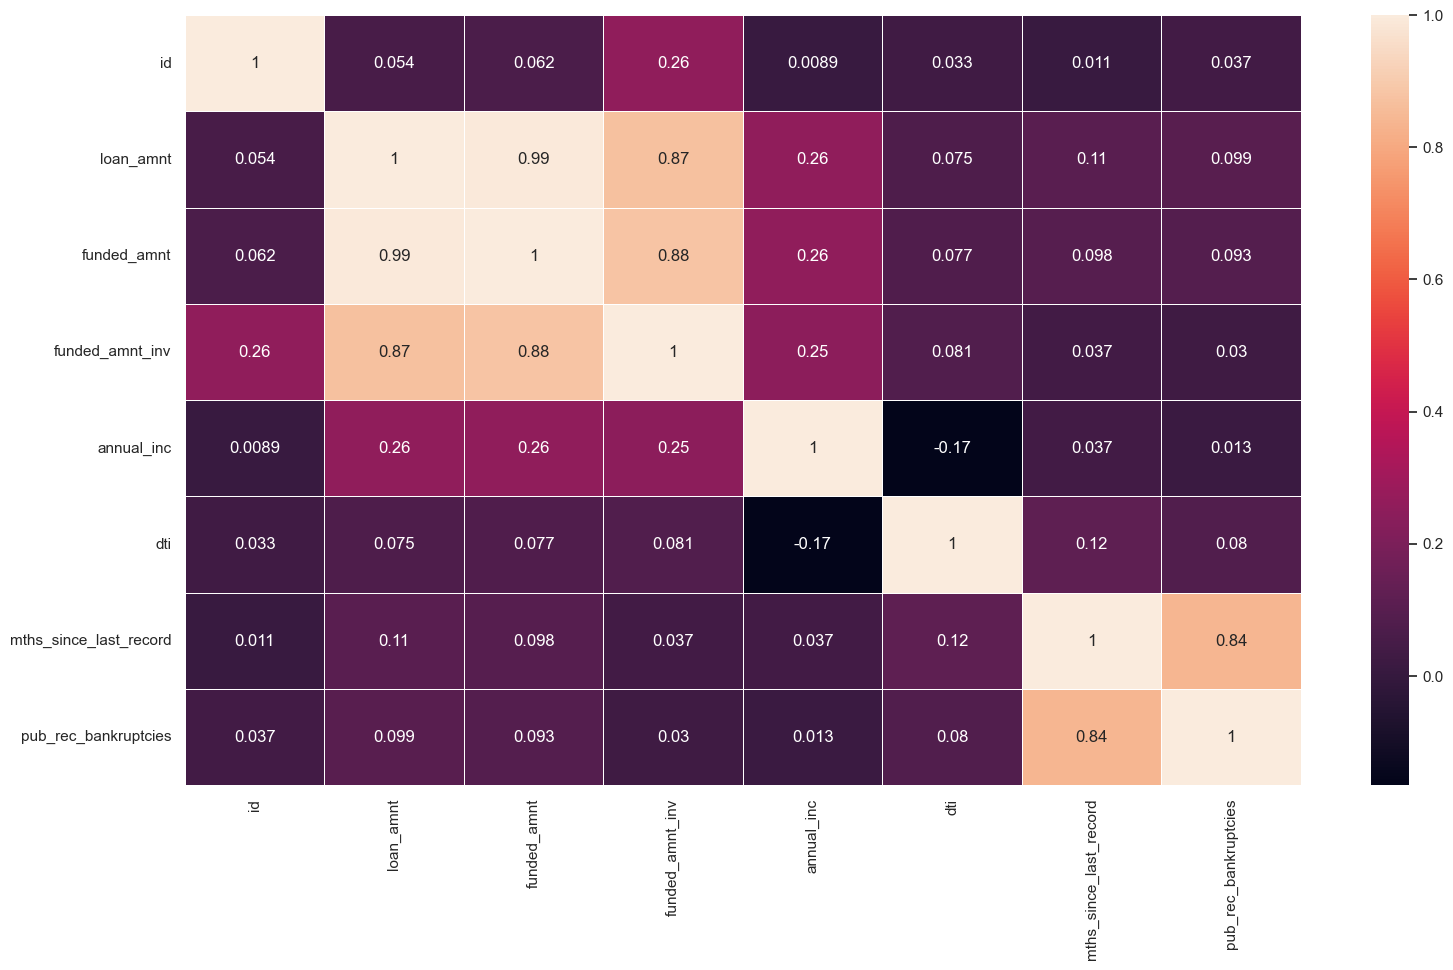

In [57]:
# Checking the corrleation using heatmap for more insights
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(loan.corr(), annot=True, linewidth=0.5)

<b><i>Features such as 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' are Highly correlated so any one of the Feature can be chosen.
Similarly, Features such as total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int' are Highly correlated anyone can be chosen.<i><b>

In [55]:
# Accessing all such numericals columns having sum of all entries as 0.
loan_Numerical.columns[loan_Numerical.apply(lambda loan: loan.sum()==0)]

Index([], dtype='object')

In [60]:
loan=loan.drop(['funded_amnt','funded_amnt_inv'],axis=1)
loan.shape

(555, 21)

In [61]:
loan.sample(10)

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_record,pub_rec_bankruptcies
16641,729081,14000,60 months,17.51%,E,E4,USPS/Nashua L&DC,10+ years,OWN,56000.00,Verified,11-Apr,Fully Paid,I will be using the loan money to pay off the ...,home_improvement,Debt Consolidation,038xx,NH,16.44,103.0,1.0
39475,186572,12000,36 months,9.01%,B,B2,Bank of America Corp.,6 years,MORTGAGE,100671.39,Not Verified,7-Dec,Fully Paid,To paydown credit cards at a more favorable rate.,credit_card,Debt Consolidation,604xx,IL,6.64,115.0,1.0
31671,491747,2875,36 months,14.59%,D,D1,Collins Pipe & Supply,10+ years,MORTGAGE,79000.00,Not Verified,10-Mar,Fully Paid,Borrower added on 03/08/10 > Eight or Nine y...,credit_card,Payoff HSBC,060xx,CT,11.92,87.0,1.0
38916,284168,8400,36 months,10.39%,B,B4,Park University,< 1 year,MORTGAGE,35004.00,Not Verified,8-Mar,Fully Paid,This loan will be used to pay for wedding expe...,wedding,Wedding,641xx,MO,19.61,66.0,0.0
11064,821321,4800,36 months,14.79%,C,C4,Kayne Anderson,4 years,RENT,61000.00,Not Verified,11-Jul,Fully Paid,Borrower added on 07/19/11 > Relocating my s...,moving,spokane,900xx,CA,6.96,104.0,1.0
9905,841209,6000,36 months,16.49%,D,D3,UnitedHealth Group,3 years,RENT,72000.00,Verified,11-Aug,Fully Paid,Borrower added on 08/04/11 > Reason for fund...,moving,Moving to Austin,060xx,CT,18.20,86.0,1.0
30402,508972,8000,36 months,14.22%,C,C5,"West Coast Arborists, Inc.",9 years,RENT,64000.00,Not Verified,10-Apr,Fully Paid,Borrower added on 04/26/10 > My family is bu...,major_purchase,"building a home, will be rent free",937xx,CA,6.96,86.0,1.0
10000,839684,7000,60 months,15.99%,D,D2,GDLS,2 years,MORTGAGE,94500.00,Verified,11-Aug,Fully Paid,Borrower added on 08/03/11 > e-mails receiva...,other,Breast Surgery,283xx,NC,21.22,85.0,1.0
11386,815248,6000,36 months,10.59%,B,B2,Kohl's Department Stores,8 years,RENT,30840.00,Verified,11-Jul,Fully Paid,Borrower added on 07/14/11 > I am seeking a ...,debt_consolidation,LittleHelpPlease,450xx,OH,16.19,93.0,1.0
9368,850602,3000,36 months,17.49%,D,D5,ak steel,10+ years,MORTGAGE,70000.00,Not Verified,11-Aug,Fully Paid,Borrower added on 08/12/11 > need loan for v...,vacation,car4me,450xx,OH,10.37,26.0,0.0


In [64]:
loan[['zip_code','addr_state']].describe()

,zip_code,addr_state
count,555,555
unique,288,44
top,606xx,CA
freq,11,101


<b>We can drop the feature 'zip_code' and 'addr_state', because address of borrower can't be a deciding factor in the loan approval process.<b>

In [65]:
loan=loan.drop(['zip_code','addr_state'], axis=1)
loan.shape

(555, 19)

In [66]:
# Understanding the 'purpose' feature
loan['purpose'].value_counts()

debt_consolidation    270
credit_card            59
home_improvement       57
other                  46
major_purchase         29
small_business         20
car                    17
medical                14
wedding                12
vacation               11
moving                  8
house                   6
educational             4
renewable_energy        2
Name: purpose, dtype: int64

In [76]:
numerical_columns = filtered_df.select_dtypes(include = ['float64','int64']).columns
numerical_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [67]:
100*(loan.groupby(['purpose'])['loan_status'].value_counts(normalize=True)).sort_values(ascending=False)

purpose             loan_status
renewable_energy    Fully Paid     100.000000
educational         Fully Paid     100.000000
car                 Fully Paid      94.117647
moving              Fully Paid      87.500000
major_purchase      Fully Paid      86.206897
wedding             Fully Paid      83.333333
other               Fully Paid      82.608696
home_improvement    Fully Paid      82.456140
medical             Fully Paid      78.571429
credit_card         Fully Paid      76.271186
debt_consolidation  Fully Paid      72.222222
small_business      Fully Paid      70.000000
vacation            Fully Paid      63.636364
house               Fully Paid      50.000000
                    Charged Off     50.000000
vacation            Charged Off     36.363636
small_business      Charged Off     30.000000
debt_consolidation  Charged Off     27.777778
credit_card         Charged Off     23.728814
medical             Charged Off     21.428571
home_improvement    Charged Off     17.543860
ot

In [68]:
# Understanding the Feature 'term'
# term:The number of payments on the loan. Values are in months and can be either 36 or 60.
loan['term'].value_counts()

36 months    428
60 months    127
Name: term, dtype: int64

In [69]:
loan.groupby(['term'])['loan_status'].value_counts()

term       loan_status
36 months  Fully Paid     346
           Charged Off     82
60 months  Fully Paid      78
           Charged Off     49
Name: loan_status, dtype: int64

In [70]:
(loan.groupby(['term'])['loan_status'].value_counts(normalize=True))*100

term       loan_status
36 months  Fully Paid     80.841121
           Charged Off    19.158879
60 months  Fully Paid     61.417323
           Charged Off    38.582677
Name: loan_status, dtype: float64

In [82]:
filtered_df[string_coulmuns].value_counts()

emp_title                            purpose             title                                 zip_code  addr_state  initial_list_status
Associated Mortgage Group, Inc.      debt_consolidation  Consolidation                         972xx     OR          f                      2
Wells Fargo                          small_business      Small Business                        782xx     TX          f                      2
SOUTHEASTERN INTEGRATED MEDICAL, PL  debt_consolidation  CONSOLIDATION LOAN                    326xx     FL          f                      2
Burrell School District              debt_consolidation  consolidate                           150xx     PA          f                      2
Sheridan Auto Group                  credit_card         Credit Card Loan                      197xx     DE          f                      2
                                                                                                                                           ..
Government 

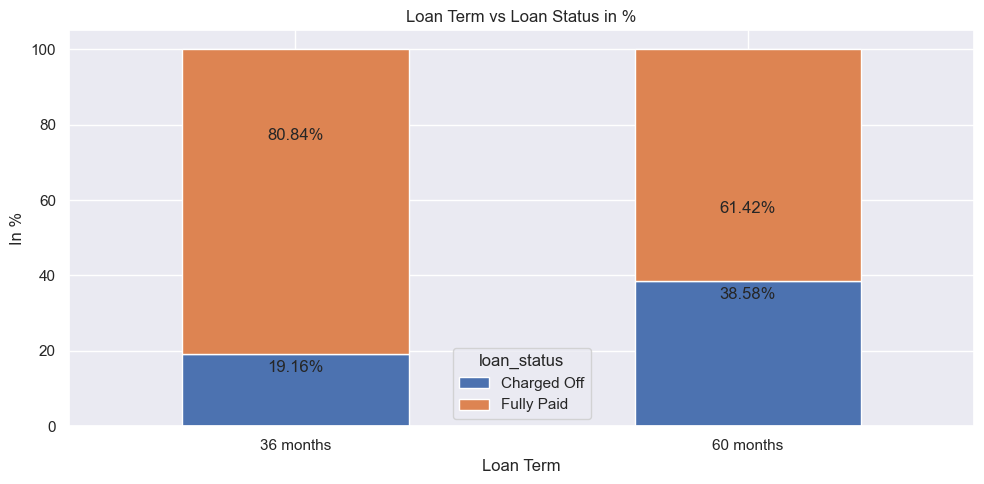

In [71]:
plots=loan.groupby('term')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,5))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, -10),
                       textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Loan Term')
plt.ylabel('In %')
plt.title('Loan Term vs Loan Status in %')
plt.tight_layout()

In [73]:
# Undersatnding the feature 'int_rate'
# int_rate: Interest Rate on the loan
loan['int_rate'].value_counts()

9.99     11
13.49    10
11.86    10
11.99     9
11.49     9
         ..
16.11     1
21.82     1
20.25     1
18.78     1
11.22     1
Name: int_rate, Length: 197, dtype: int64

#### Sanity Checks

In [72]:
# Removing the % interest rate entries in order to convert them into the numerical values for univariant analysis
loan['int_rate']=loan['int_rate'].apply(lambda x:float(x.strip('%')))
loan['int_rate'].head()  

253      7.90
359     14.65
587     12.69
767      7.90
1323    12.42
Name: int_rate, dtype: float64

### Univariate Analysis

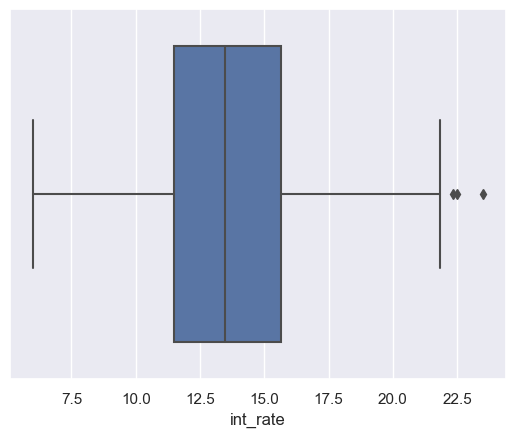

In [74]:
sns.boxplot(loan['int_rate'])
plt.show()

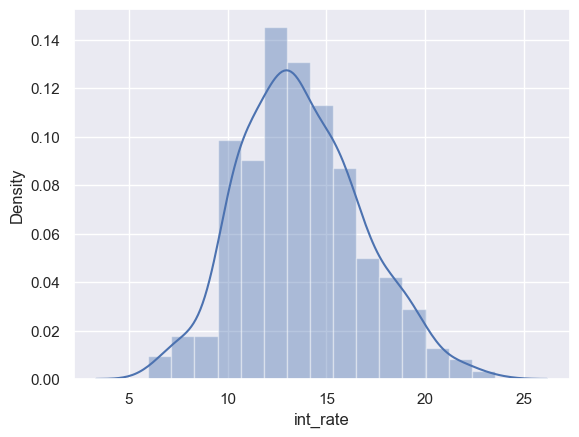

In [103]:
sns.distplot(loan['int_rate'],bins=15)
plt.show()

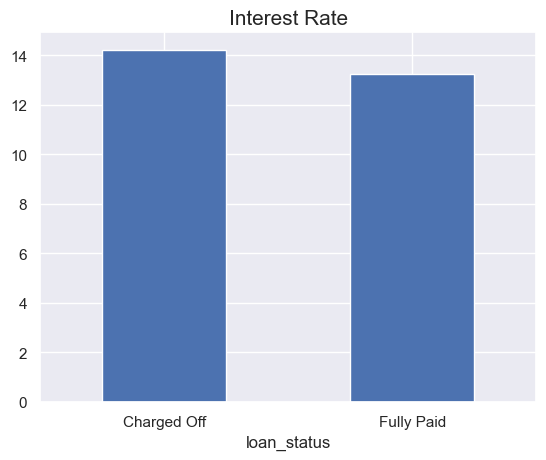

In [76]:
# As we could see the presence of outliers, we are using median plot.
loan.groupby(['loan_status'])['int_rate'].median().plot.bar(rot=0)
plt.title('Interest Rate', fontsize=15)

plt.show()

The column int_rate is an influential feature in the approval of loan process as the analysis clearly shows that interest rate below 12% are most likely to Fully Pay where as interest rate above 12% are most like to Charged off.

In [77]:
# Understanding the Feature 'grade'
# grade:LC assigned loan grade
loan.grade.head()

253     A
359     C
587     B
767     A
1323    B
Name: grade, dtype: object

In [78]:
100*(loan.groupby(['grade'])['loan_status'].value_counts(normalize=True)).sort_values(ascending=False)

grade  loan_status
A      Fully Paid     89.285714
G      Charged Off    85.714286
B      Fully Paid     84.472050
C      Fully Paid     76.543210
D      Fully Paid     72.972973
E      Fully Paid     66.666667
F      Fully Paid     65.384615
       Charged Off    34.615385
E      Charged Off    33.333333
D      Charged Off    27.027027
C      Charged Off    23.456790
B      Charged Off    15.527950
G      Fully Paid     14.285714
A      Charged Off    10.714286
Name: loan_status, dtype: float64

In [81]:
#  Understanding sub_grade Feature
loan['sub_grade'].head()

253     A4
359     C3
587     B5
767     A4
1323    B4
Name: sub_grade, dtype: object

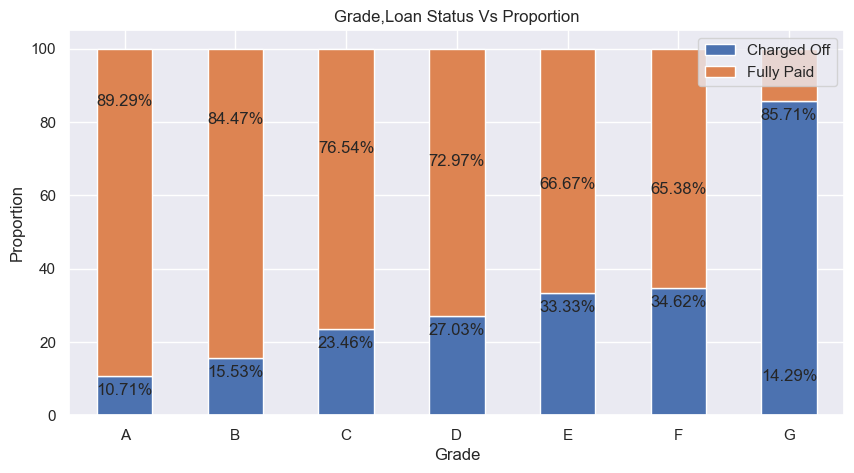

In [79]:
plots=loan.groupby('grade')['loan_status'].value_counts().unstack()\
.apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,5))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, -10),
                       textcoords='offset points')
plt.xticks(rotation=0)
plt.ylabel("Proportion")
plt.legend(loc='upper right')
plt.title("Grade,Loan Status Vs Proportion")
plt.xlabel('Grade')
plt.show()

<i>Grade is having singnificant impact on Loan Approval Process. Higher the Grade are more likely to Fully Pay and lower the Grade are more likely to Charged Off (A>B>C>D>E>F>G)<i>

In [80]:
100*(loan.groupby(['sub_grade'])['loan_status'].value_counts(normalize=True)).sort_values(ascending=False)

sub_grade  loan_status
A2         Fully Paid     100.000000
A3         Fully Paid     100.000000
G3         Charged Off    100.000000
G2         Charged Off    100.000000
F3         Fully Paid     100.000000
F2         Fully Paid     100.000000
G5         Charged Off    100.000000
B4         Fully Paid      91.176471
A4         Fully Paid      88.888889
A5         Fully Paid      88.235294
B2         Fully Paid      85.714286
B1         Fully Paid      85.714286
D1         Fully Paid      85.714286
C5         Fully Paid      83.870968
C3         Fully Paid      81.250000
B3         Fully Paid      80.769231
B5         Fully Paid      80.769231
C4         Fully Paid      80.000000
D5         Fully Paid      76.470588
E3         Fully Paid      75.000000
E4         Fully Paid      75.000000
C2         Fully Paid      72.972973
D4         Fully Paid      70.833333
E2         Fully Paid      70.588235
D2         Fully Paid      70.000000
F4         Fully Paid      66.666667
C1         Full

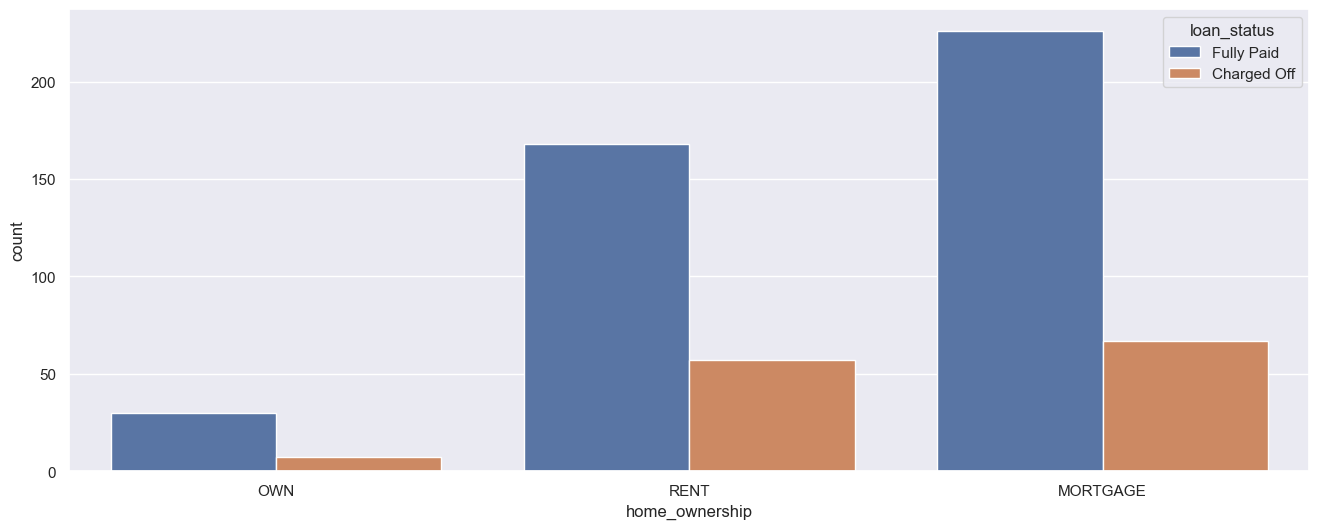

In [82]:
plt.figure(figsize=(16,6))
sns.countplot(x ='home_ownership', data = loan, hue='loan_status')
plt.show()

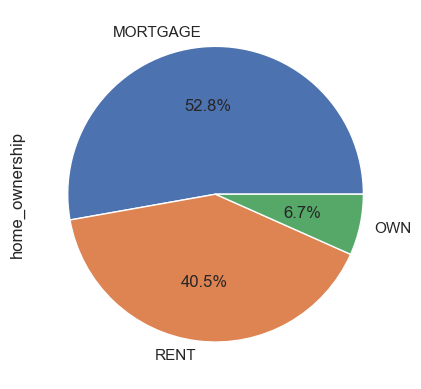

In [83]:
loan1= loan[loan['home_ownership']!='NONE']
loan1['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Outlier treatment

<AxesSubplot:xlabel='annual_inc'>

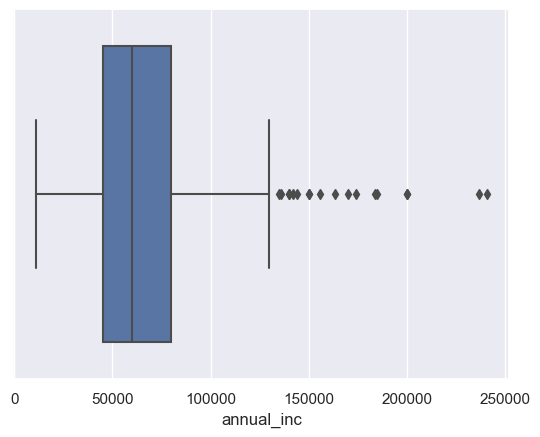

In [85]:
#analyse outliers in annual_inc using boxplot
sns.boxplot(loan['annual_inc'])

In [87]:
#describing annual_inc column to get more insite
loan.annual_inc.describe()

count       555.000000
mean      65423.731676
std       30860.188582
min       11029.000000
25%       45000.000000
50%       60000.000000
75%       79942.500000
max      240734.000000
Name: annual_inc, dtype: float64

In [89]:
loan.annual_inc.quantile([0.90, 0.95, 0.97,0.98, 0.99])

0.90    101168.556
0.95    120000.000
0.97    135380.000
0.98    149520.000
0.99    178600.000
Name: annual_inc, dtype: float64

In [92]:
#removing the values after 95 percentile
percent_95 = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= percent_95]

<AxesSubplot:xlabel='annual_inc'>

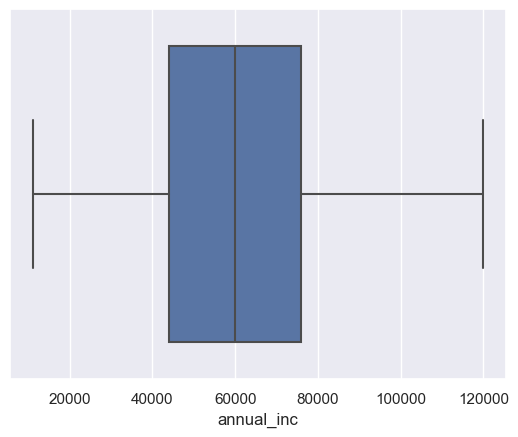

In [94]:
sns.boxplot(loan['annual_inc'])

There is no such outliers in "annual_inc". So, let's can proceed further

### Derived Variables

#### Let's create new columns from date type columns

In [104]:
# Understanding Feature 'dti'
# 'dti': A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations,
# excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
loan['dti'].describe()

count    530.000000
mean      13.171358
std        6.381317
min        0.000000
25%        8.167500
50%       13.475000
75%       18.147500
max       24.960000
Name: dti, dtype: float64

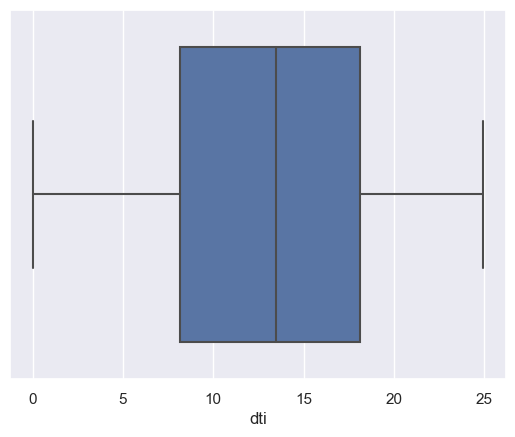

In [105]:
sns.boxplot(loan['dti'])
plt.show()

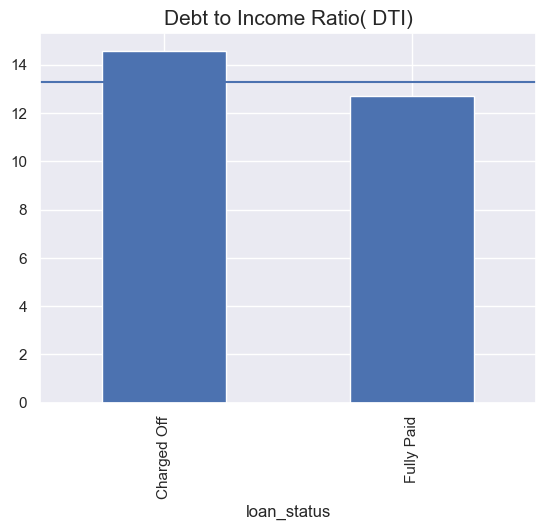

In [106]:
# As there are no oulier in the DTI Feature so we can consider a mean plot.
loan.groupby(['loan_status'])['dti'].mean().plot.bar()
plt.axhline(y=13.27)
plt.title('''Debt to Income Ratio( DTI)''', fontsize=15)
plt.show()

<b>If the DTI Ratio is more than 13.27 then Borrowers are most likely to Default.<b>

In [107]:
# Understanding the feature 'issue_d'
# 'issue_d':The month which the loan was funded
loan['issue_d'].sample(5)

8322     11-Sep
3650     11-Nov
23968    10-Nov
36401     9-Jun
18948    11-Feb
Name: issue_d, dtype: object

In [108]:

loan[['Issue_Month','Issue_Year']]=loan['issue_d'].str.split('-',expand=True)

In [109]:
loan['Issue_Year'].value_counts(normalize=True)*100

Jul    10.188679
Mar     9.245283
Aug     9.056604
Dec     8.867925
Jun     8.679245
Nov     8.490566
Oct     8.490566
Sep     7.924528
Apr     7.924528
Jan     7.924528
May     7.735849
Feb     5.471698
Name: Issue_Year, dtype: float64

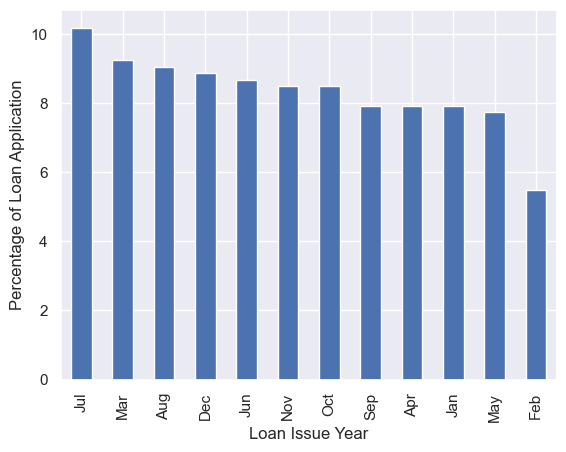

In [110]:
loan_year=loan['Issue_Year'].value_counts(normalize=True)*100
loan_year.plot.bar()
plt.xlabel('Loan Issue Year')
plt.ylabel('Percentage of Loan Application')
plt.show()

In [111]:
loan.groupby(['loan_status'])['Issue_Year'].value_counts()

loan_status  Issue_Year
Charged Off  Aug           14
             Jul           14
             Jun           14
             Nov           14
             May           13
             Apr           11
             Dec           10
             Jan            9
             Oct            9
             Feb            8
             Sep            7
             Mar            5
Fully Paid   Mar           44
             Jul           40
             Dec           37
             Oct           36
             Sep           35
             Aug           34
             Jan           33
             Jun           32
             Apr           31
             Nov           31
             May           28
             Feb           21
Name: Issue_Year, dtype: int64

In [112]:
loan.groupby(['loan_status'])['Issue_Month'].value_counts()

loan_status  Issue_Month
Charged Off  11              59
             10              42
             8               13
             9               12
             7                2
Fully Paid   11             188
             10             117
             9               54
             8               39
             7                4
Name: Issue_Month, dtype: int64

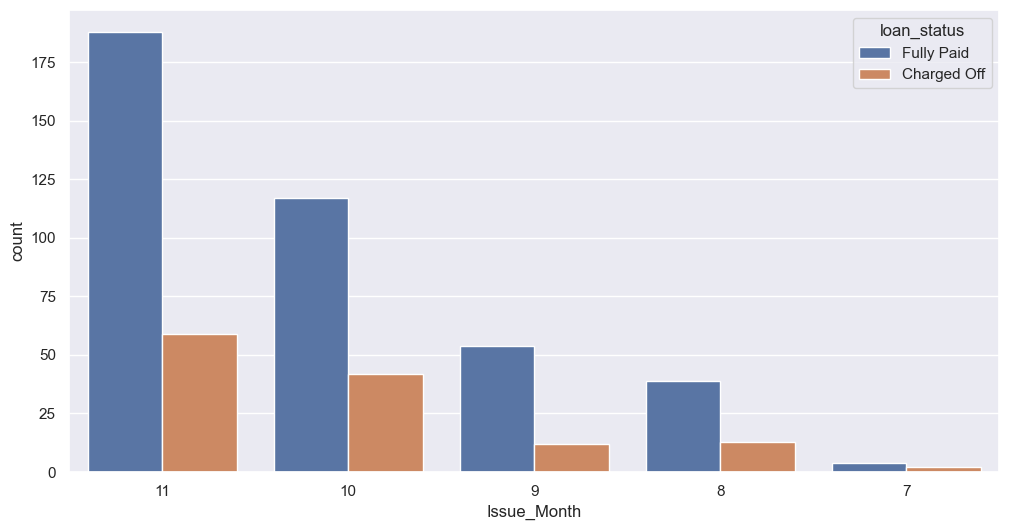

In [113]:
plt.figure(figsize=(12,6))
sns.countplot(data=loan,x='Issue_Month',hue='loan_status')
plt.show()

In [114]:
loan['loan_status_Numerical']=loan['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)
loan.sample(5)

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,dti,mths_since_last_record,pub_rec_bankruptcies,Issue_Month,Issue_Year,loan_status_Numerical
38235,361945,15000,36 months,13.99,D,D3,Companion Hospice/Home Health,4 years,MORTGAGE,64000.00,Not Verified,8-Nov,Charged Off,To use part of the money to pay off and close ...,home_improvement,Personal loan,5.38,18.0,0.0,8,Nov,1
33552,466482,3500,36 months,13.57,C,C3,Motion Industries,10+ years,OWN,88000.00,Not Verified,9-Dec,Fully Paid,584396 added on 12/05/09 > I want to purchas...,major_purchase,26 Years at My Job_Good Credit Borrower,16.05,53.0,0.0,9,Dec,0
34052,457776,16000,36 months,15.65,D,D4,United State Postal Service,10+ years,MORTGAGE,53684.00,Not Verified,9-Nov,Fully Paid,569403 added on 11/06/09 > I work for the Uni...,debt_consolidation,free2009,12.94,86.0,1.0,9,Nov,0
39475,186572,12000,36 months,9.01,B,B2,Bank of America Corp.,6 years,MORTGAGE,100671.39,Not Verified,7-Dec,Fully Paid,To paydown credit cards at a more favorable rate.,credit_card,Debt Consolidation,6.64,115.0,1.0,7,Dec,0
31588,493442,10000,36 months,15.33,D,D3,Halliburton Energy,10+ years,MORTGAGE,68000.00,Not Verified,10-Mar,Fully Paid,Borrower added on 03/10/10 > The amount that...,credit_card,Credit Card Pay Off--YEAH!!!!!,15.37,112.0,1.0,10,Mar,0


In [115]:
loan.describe()

,id,loan_amnt,int_rate,annual_inc,dti,mths_since_last_record,pub_rec_bankruptcies,loan_status_Numerical
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,6.294990e+05,9421.839623,13.709377,61090.952981,13.171358,86.962264,0.694340,0.241509
std,2.163478e+05,5994.397641,3.081903,22964.694185,6.381317,25.487283,0.461122,0.428403
min,6.141900e+04,1000.000000,5.990000,11029.000000,0.000000,6.000000,0.000000,0.000000
25%,4.784170e+05,5000.000000,11.490000,43913.870000,8.167500,73.000000,0.000000,0.000000
50%,6.099850e+05,8000.000000,13.480000,60000.000000,13.475000,94.000000,1.000000,0.000000
75%,8.009622e+05,12000.000000,15.650000,76000.000000,18.147500,106.000000,1.000000,0.000000
max,1.066424e+06,35000.000000,23.520000,120000.000000,24.960000,120.000000,1.000000,1.000000


<b>Around 14.6% Borrower got defaulted who's average annual income is below 59K USD for the average loan amount of around 11K USD. Hence Lending Club should check before approving such kind of Loan profile.<b>

### Bivariate Analysis
Let's analyse Loan amount with every variables.

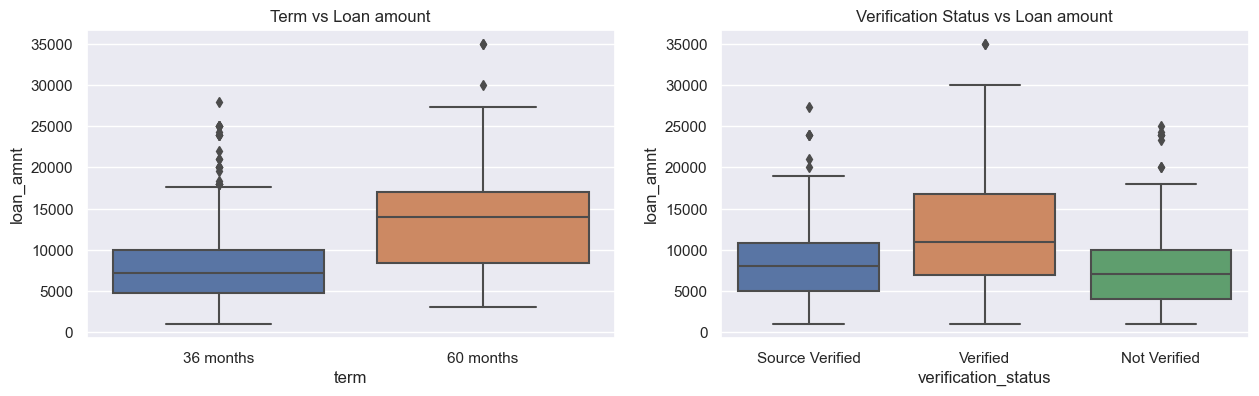

In [117]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=loan)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=loan)
plt.title("Verification Status vs Loan amount")
plt.show()

Observations
- In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
- In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified

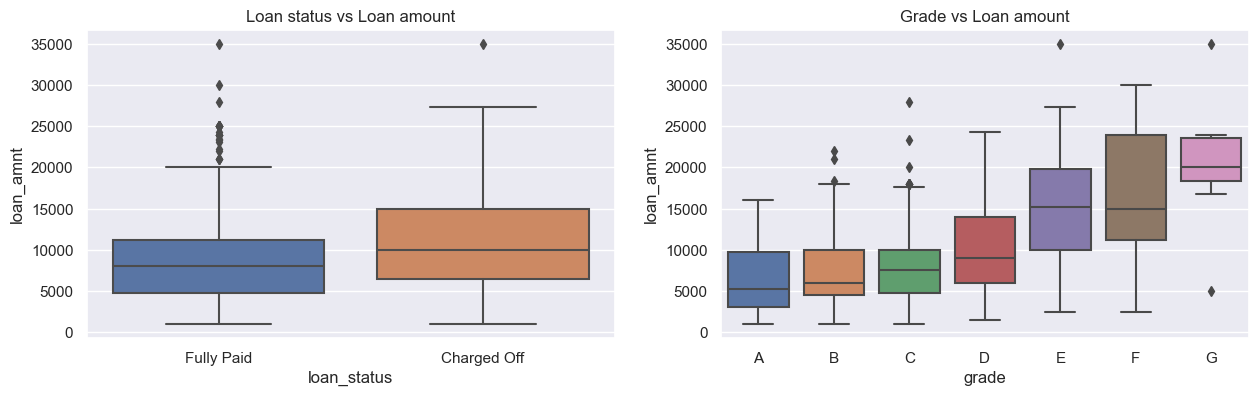

In [119]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=loan)
plt.title("Grade vs Loan amount")
plt.show()

Observations
- In loan amount vs Loan status variable we can say that, charged off were having higher loan amount than fully paid.
- In Grade vs loan amount we can say that, grade F & G are having max amount of loan. As the grade decreases amount of loan is increasing.
- We can say that higher the grade more is the risk of default.

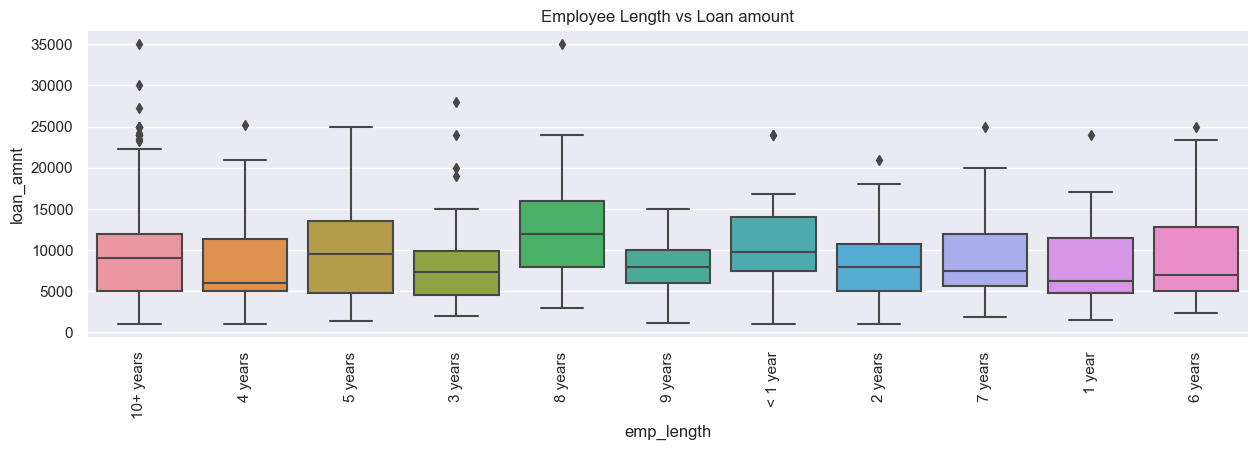

In [120]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=loan)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

Observations
- In loan amount vs employee length variable we can say that, the borrower who has 10+ years of experience are taking high amount of loan than others and borrowers with less than 1 year of experience are taking lesser amount of loan compared to others.

##### Let's analyse Annual Income with every variables.

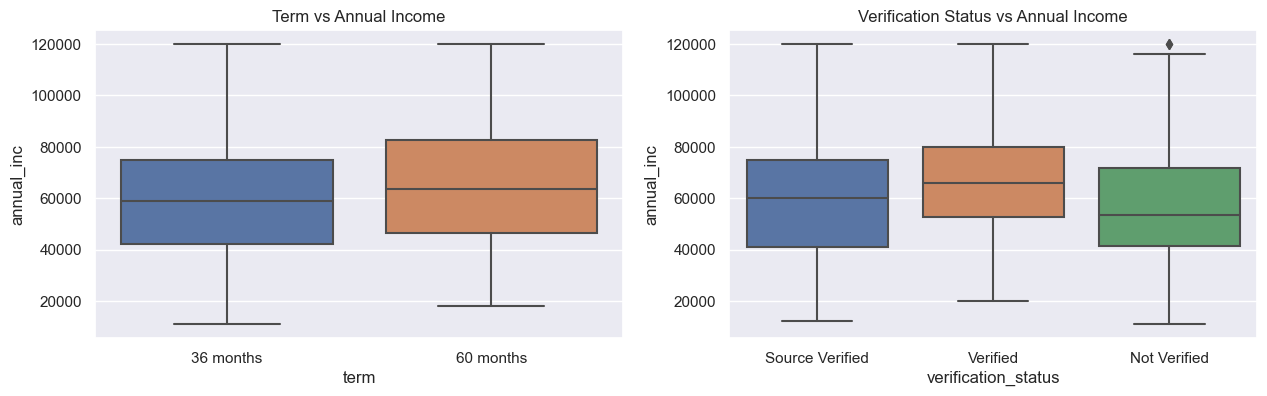

In [121]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=loan)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=loan)
plt.title("Verification Status vs Annual Income")
plt.show()

Observations
- In Term vs Annual Income variable we can say that, the borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.
- In Verification status vs annual income we can say that, mostly the verified borrowers are having high annual income than others.

#### Let's segment Interest Rate with every variables.

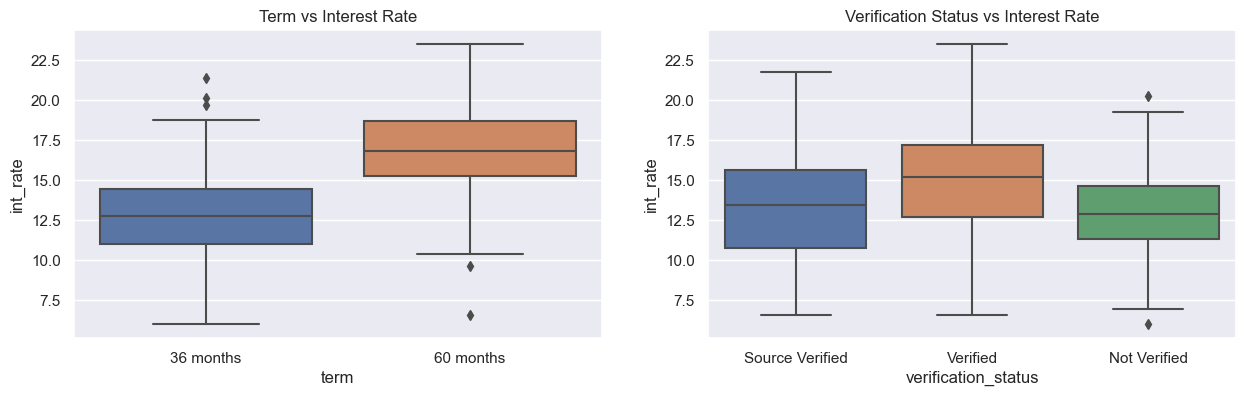

In [122]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=loan)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=loan)
plt.title("Verification Status vs Interest Rate")
plt.show()

### Multivariate Analysis

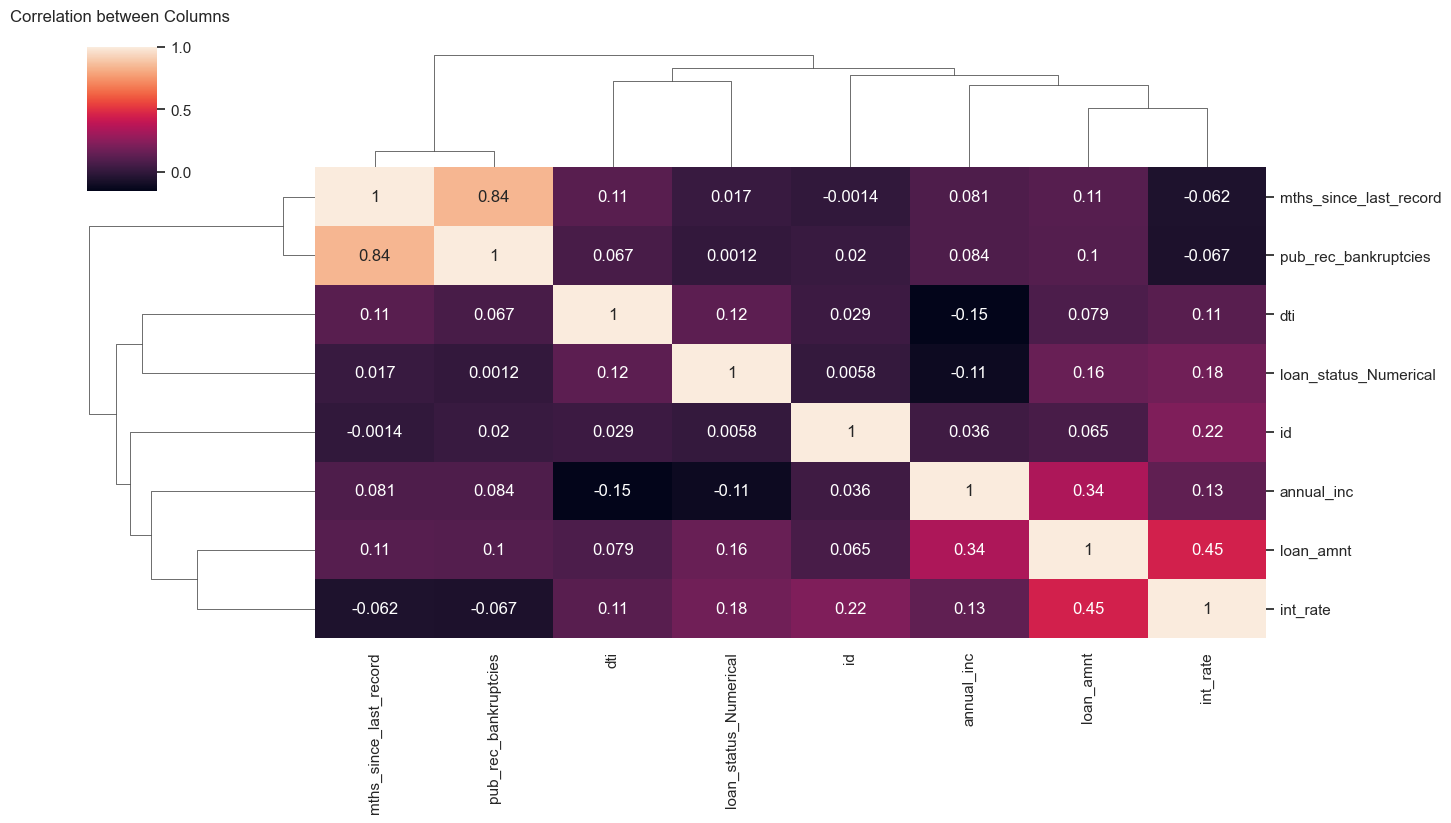

In [125]:
#finding correlation matrix
data_correlation = loan.corr()
#plotting correaltion matrix on clustermap
sns.clustermap(data_correlation,annot=True,figsize=(14, 8))
plt.title("Correlation between Columns \n")
plt.show()

Observations
- <b>Loan_amnt , funded_amnt , funded_amnt_inv , installment are strongly correlated.<b>
- Annual_inc and dti is negatively correlated.
- Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts.
- Which means when annual_inc is low, debt is high and vice versa.